# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Открываем файл с данными и изучаем общую информацию

In [12]:
!pip install missingno
import missingno as msno
import pandas as pd
import numpy as np
from IPython.display import display
%matplotlib inline
df = pd.read_csv('C:/Users/Asus/datasets/data.csv')
df

children  days_employed  dob_years education  education_id  \
0             1   -8437.673028         42    высшее             0   
1             1   -4024.803754         36   среднее             1   
2             0   -5623.422610         33   Среднее             1   
3             3   -4124.747207         32   среднее             1   
4             0  340266.072047         53   среднее             1   
...         ...            ...        ...       ...           ...   
21520         1   -4529.316663         43   среднее             1   
21521         0  343937.404131         67   среднее             1   
21522         1   -2113.346888         38   среднее             1   
21523         3   -3112.481705         38   среднее             1   
21524         2   -1984.507589         40   среднее             1   

          family_status  family_status_id gender income_type  debt  \
0       женат / замужем                 0      F   сотрудник     0   
1       женат / замужем                 0      F   сотрудник     0   
2       женат / замужем                 0      M   сотрудник     0   
3       женат / замужем                 0      M   сотрудник     0   
4      гражданский брак                 1      F   пенсионер     0   
...                 ...               ...    ...         ...   ...   
21520  гражданский брак                 1      F   компаньон     0   
21521   женат / замужем                 0      F   пенсионер     0   
21522  гражданский брак                 1      M   сотрудник     1   
21523   женат / замужем                 0      M   сотрудник     1   
21524   женат / замужем                 0      F   сотрудник     0   

        total_income                       purpose  
0      253875.639453                 покупка жилья  
1      112080.014102       приобретение автомобиля  
2      145885.952297                 покупка жилья  
3      267628.550329    дополнительное образование  
4      158616.077870               сыграть свадьбу  
...              ...                           ...  
21520  224791.862382             операции с жильем  
21521  155999.806512          сделка с автомобилем  
21522   89672.561153                  недвижимость  
21523  244093.050500  на покупку своего автомобиля  
21524   82047.418899         на покупку автомобиля  

[21525 rows x 12 columns]

_Наш датасет готов. Давайте исследуем его поближе. Вот описание нашего датасета:_

- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

_Сразу видим, что днные придется чистить. Давайте разбираться, что именно._

## Шаг 2. Предобработка данных

### Обработка пропусков

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


_Всего в датасете 21 525 записей, по 12 столбцов в каждой. В двух есть пропуски. Названия столбцов в норме и не требуют переименования. Типы днных соответствуют хранящейся в столбцах информации._

children  days_employed  dob_years education  education_id  \
12            0            NaN         65   среднее             1   
26            0            NaN         41   среднее             1   
29            0            NaN         63   среднее             1   
41            0            NaN         50   среднее             1   
55            0            NaN         54   среднее             1   
...         ...            ...        ...       ...           ...   
21489         2            NaN         47   Среднее             1   
21495         1            NaN         50   среднее             1   
21497         0            NaN         48    ВЫСШЕЕ             0   
21502         1            NaN         42   среднее             1   
21510         2            NaN         28   среднее             1   

               family_status  family_status_id gender  income_type  debt  \
12          гражданский брак                 1      M    пенсионер     0   
26           женат / замужем                 0      M  госслужащий     0   
29     Не женат / не замужем                 4      F    пенсионер     0   
41           женат / замужем                 0      F  госслужащий     0   
55          гражданский брак                 1      F    пенсионер     1   
...                      ...               ...    ...          ...   ...   
21489        женат / замужем                 0      M    компаньон     0   
21495       гражданский брак                 1      F    сотрудник     0   
21497        женат / замужем                 0      F    компаньон     0   
21502        женат / замужем                 0      F    сотрудник     0   
21510        женат / замужем                 0      F    сотрудник     0   

       total_income                           purpose  
12              NaN                   сыграть свадьбу  
26              NaN                       образование  
29              NaN  строительство жилой недвижимости  
41              NaN  сделка с подержанным автомобилем  
55              NaN                   сыграть свадьбу  
...             ...                               ...  
21489           NaN              сделка с автомобилем  
21495           NaN                           свадьба  
21497           NaN        строительство недвижимости  
21502           NaN  строительство жилой недвижимости  
21510           NaN           приобретение автомобиля  

[2174 rows x 12 columns]

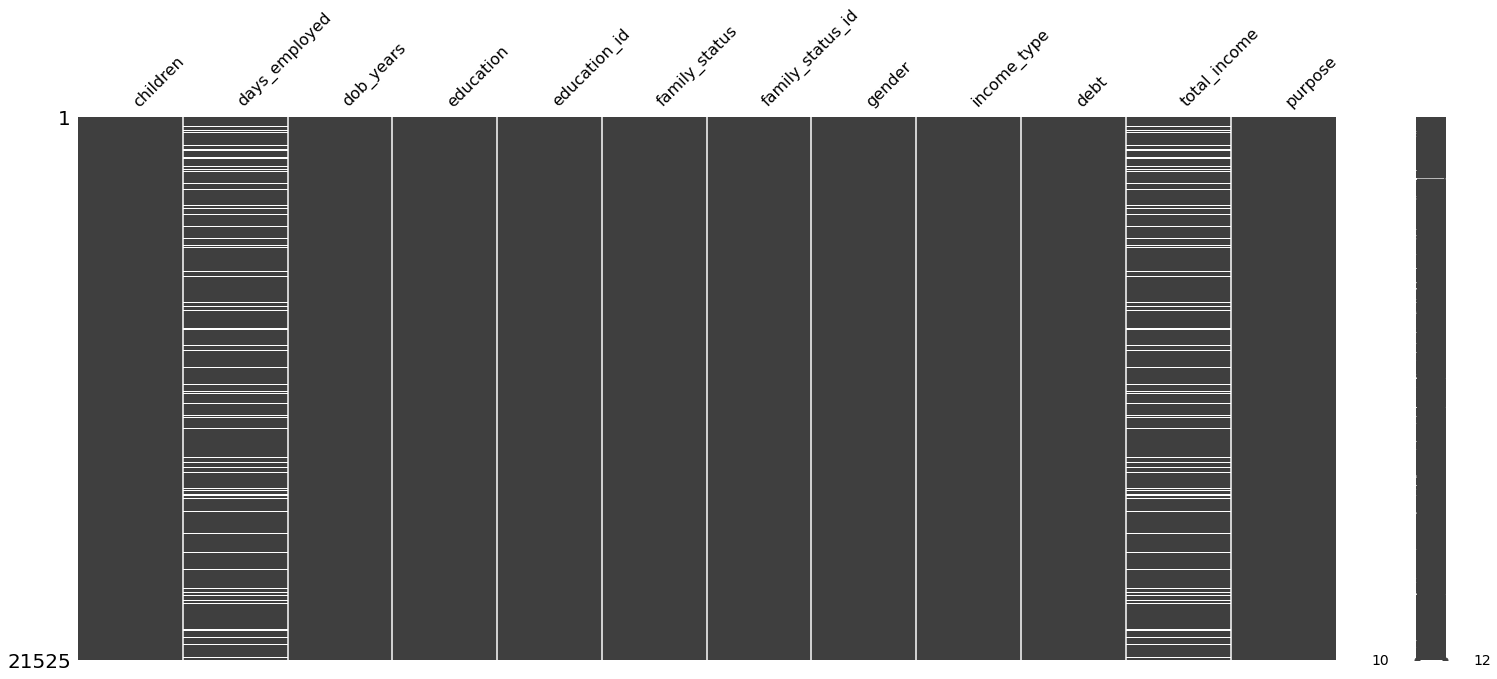

In [13]:
# Смотрим расположение пропусков
msno.matrix(df)
df[df['total_income'].isnull()]


_Видим, что значения NaN пристствуют в двух столбцах days_employed и total_income, причем в одних и тех же записях. Такое расределение говорит о технологическом происхождении пропусков. Мог произойти сбой при обмене данными. Общее количество строк с пропусками 2174, что составляет примерно 10ую часть датасета. Данными о стаже можно б было пренебречь, но вот информация об общем доходе клиента одна из ключевых в банковском скоринге. 
Но не все потеряно. У нас есть информация об источнике дохода. Попробуем заменить пропущенные значения на медианные по группам. Заодно избавимся от минусов в стаже._

In [15]:
# Заменяем пропуски на медиану по группе
df['days_employed'] = df.groupby('income_type')['days_employed'].apply(lambda s: s.fillna(s.median()))
df['total_income'] = df.groupby('income_type')['total_income'].apply(lambda s: s.fillna(s.median()))

# Убираем минусы в days_employed
df['days_employed'] = df['days_employed'].apply(lambda x: -x if x < 0 else x)
# Проверяем, что все сработало
df[df.days_employed.isnull()]

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []

_С пропусками справились. Стоит проверить остальные столбцы на корректность содержимого._

In [19]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

_В колонке с количеством детей значения -1 и 20 выглядят подозрительно. Рассмотрим их поближе._

In [20]:
df[(df.children == -1) | (df.children == 20)]['children'].count()

123

_123 записи. Надо восстанавливать. Похоже на ошибку при вводе значений. Вместо -1 поставим 1, а вместо 20 поставим 2._

In [21]:
df['children'] = df['children'].replace(-1, 1)
df['children'] = df['children'].replace(20, 2)
df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

_Done! Проверим другие столбцы._

In [22]:
df['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

_Все ясно. Приведем все значения к нижнему регистру._

In [23]:
df['education'] = df['education'].str.lower()
df['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

_Порядок! Движемся дальше._

In [24]:
df.groupby(['education', 'education_id']).count()

children  days_employed  dob_years  \
education           education_id                                       
высшее              0                 5260           5260       5260   
начальное           3                  282            282        282   
неоконченное высшее 2                  744            744        744   
среднее             1                15233          15233      15233   
ученая степень      4                    6              6          6   

                                  family_status  family_status_id  gender  \
education           education_id                                            
высшее              0                      5260              5260    5260   
начальное           3                       282               282     282   
неоконченное высшее 2                       744               744     744   
среднее             1                     15233             15233   15233   
ученая степень      4                         6                 6       6   

                                  income_type   debt  total_income  purpose  
education           education_id                                             
высшее              0                    5260   5260          5260     5260  
начальное           3                     282    282           282      282  
неоконченное высшее 2                     744    744           744      744  
среднее             1                   15233  15233         15233    15233  
ученая степень      4                       6      6             6        6

_Столбцы education и education_id полность соответствуют друг-другу. Имеем избыточную информацию в таблице. Удалим текстовый столбец в отдельный словарь. Аналогичная ситуация с семейным статусом. Удалим оба после анализа семейного статуса._

In [25]:
df['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75], dtype=int64)

In [26]:
df[df.dob_years == 0]['dob_years'].count()

101

_Возраст со значением 0 нас не устраивает. Поступим с ним также как доходом. Только менять будем на среднее по группе._

In [28]:
df['dob_years'] = df['dob_years'].replace(0, np.nan)
df['dob_years'] = df.groupby('income_type')['dob_years'].apply(lambda s: s.fillna(s.mean()))

In [29]:
df['dob_years'].agg(['min', 'max', 'mean', 'median'])

min       19.000000
max       75.000000
mean      43.499204
median    43.000000
Name: dob_years, dtype: float64

_С возрастом разобрались, движемся дальше._

In [30]:
df['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [31]:
df['family_status'] = df['family_status'].str.lower()
df.groupby(['family_status', 'family_status_id']).count()

children  days_employed  dob_years  \
family_status         family_status_id                                       
в разводе             3                     1195           1195       1195   
вдовец / вдова        2                      960            960        960   
гражданский брак      1                     4177           4177       4177   
женат / замужем       0                    12380          12380      12380   
не женат / не замужем 4                     2813           2813       2813   

                                        education  education_id  gender  \
family_status         family_status_id                                    
в разводе             3                      1195          1195    1195   
вдовец / вдова        2                       960           960     960   
гражданский брак      1                      4177          4177    4177   
женат / замужем       0                     12380         12380   12380   
не женат / не замужем 4                      2813          2813    2813   

                                        income_type   debt  total_income  \
family_status         family_status_id                                     
в разводе             3                        1195   1195          1195   
вдовец / вдова        2                         960    960           960   
гражданский брак      1                        4177   4177          4177   
женат / замужем       0                       12380  12380         12380   
не женат / не замужем 4                        2813   2813          2813   

                                        purpose  
family_status         family_status_id           
в разводе             3                    1195  
вдовец / вдова        2                     960  
гражданский брак      1                    4177  
женат / замужем       0                   12380  
не женат / не замужем 4                    2813

_С семейным статусом все в порядке. family_status и family_status_id соответствуют друг-другу. Информация избыточна. Удалим, когда будем делать категоризацию_

In [32]:
df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [33]:
df[df['gender'] == 'XNA']

children  days_employed  dob_years            education  education_id  \
10701         0    2358.600502       24.0  неоконченное высшее             2   

          family_status  family_status_id gender income_type  debt  \
10701  гражданский брак                 1    XNA   компаньон     0   

        total_income               purpose  
10701  203905.157261  покупка недвижимости

_Единственная запись с неопределенным полом: студент или студентка 24 лет в гражданском браке. Бизнес и неплохой доход. Пусть будет студентка. Добавим к большей группе, чтобы не рушить статистику._

In [34]:
df['gender'] = df['gender'].replace('XNA', 'F')
df[df['gender'] == 'XNA']

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []

_С полом рзобрались, остался один стобец с наличием задолженности._

In [35]:
df['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

_Как видим, тут все в порядке._

**Вывод**

_Нам достался довольно грязный датасет. Почти в каждом столбце пришлось заменять значения. В children мы заменили -1 на 1, а 20 на 2. В days_employed избавились от минусовых значений, заменив их положительными и избавились от NaN, заменив их на медиану по группе источника дохода. В dob_years 0 заменили на среднее значение по группе источника дохода. В education все значения привели к нижнему регистру и проверили на соответствие education_id. family_status тоже привели к нижнему регистру и проверили на соответствие family_status_id. В gender обнаружили пропуск значения и зааменили его на женский пол. В total_income все NaN заменили на медиану по группе источника дохода. Теперь наш датасет чист как стеклышко! Осталось натереть до блеска..._

### Замена типа данных

In [36]:
# Меняем вещественный тип на целое
df['days_employed'] = df['days_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  int32  
 2   dob_years         21525 non-null  float64
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int32  
 11  purpose           21525 non-null  object 
dtypes: float64(1), int32(2), int64(4), object(5)
memory usage: 1.8+ MB


**Вывод**

_Мы заменили вещественный тип данных на целочисленный методом .astype() в столбцах со стажем и общим доходом._

### Обработка дубликатов

In [37]:
df.duplicated().sum()

71

 _В датасете обнаружен 71 явный дубликат. Взгянем на них поближе:_

In [24]:
df[df.duplicated()]

children  days_employed  dob_years education  education_id  \
2849          0           1574         41   среднее             1   
3290          0         365213         58   среднее             1   
4182          1           1574         34    высшее             0   
4851          0         365213         60   среднее             1   
5557          0         365213         58   среднее             1   
...         ...            ...        ...       ...           ...   
20702         0         365213         64   среднее             1   
21032         0         365213         60   среднее             1   
21132         0           1574         47   среднее             1   
21281         1           1574         30    высшее             0   
21415         0         365213         54   среднее             1   

          family_status  family_status_id gender income_type  debt  \
2849    женат / замужем                 0      F   сотрудник     0   
3290   гражданский брак                 1      F   пенсионер     0   
4182   гражданский брак                 1      F   сотрудник     0   
4851   гражданский брак                 1      F   пенсионер     0   
5557   гражданский брак                 1      F   пенсионер     0   
...                 ...               ...    ...         ...   ...   
20702   женат / замужем                 0      F   пенсионер     0   
21032   женат / замужем                 0      F   пенсионер     0   
21132   женат / замужем                 0      F   сотрудник     0   
21281   женат / замужем                 0      F   сотрудник     0   
21415   женат / замужем                 0      F   пенсионер     0   

       total_income                            purpose  
2849         142594            покупка жилья для семьи  
3290         118514                    сыграть свадьбу  
4182         142594                            свадьба  
4851         118514                            свадьба  
5557         118514                    сыграть свадьбу  
...             ...                                ...  
20702        118514         дополнительное образование  
21032        118514              заняться образованием  
21132        142594                       ремонт жилью  
21281        142594  покупка коммерческой недвижимости  
21415        118514                  операции с жильем  

[71 rows x 12 columns]

_На вид ни чего особенного. Т.к. данные у нас обезличены, трудно предоложить причину их возникновения. Возможно это связано с человеческим фактором. Сотрудники банка могли продублировать заявки. Удаляем дубликаты без сожалений!_

In [38]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

**Вывод**

_После удаления явных дубикатов наш датсет потерял 71 строку, но в нем еще достаточно данных для анализа._

### Лемматизация

In [73]:
# !pip install pymystem3
from pymystem3 import Mystem
from collections import Counter
from functools import lru_cache
m = Mystem()
# Кэшируем результаты лемитизации пословно
@lru_cache
def cached_lemmatize(word):
    return m.lemmatize(word)

# Общий список лемм
lem_summary = []
def lemmatization(row):
    res = []
    for word in row['purpose'].split():
        res += cached_lemmatize(word)
    # Дополняем общий список
    lem_summary.extend(res)
    return res
try:
    df['lemmas'] = df.apply(lemmatization, axis=1)
except:
    print('Что-то пошло не так!')
df

children  dob_years  education_id  family_status_id gender income_type  \
0             1       42.0             0                 0      F   сотрудник   
1             1       36.0             1                 0      F   сотрудник   
2             0       33.0             1                 0      M   сотрудник   
3             3       32.0             1                 0      M   сотрудник   
4             0       53.0             1                 1      F   пенсионер   
...         ...        ...           ...               ...    ...         ...   
21449         1       43.0             1                 1      F   компаньон   
21450         0       67.0             1                 0      F   пенсионер   
21451         1       38.0             1                 1      M   сотрудник   
21452         3       38.0             1                 0      M   сотрудник   
21453         2       40.0             1                 0      F   сотрудник   

       debt  total_income                       purpose total_income_id  \
0         0        253875                 покупка жилья               8   
1         0        112080       приобретение автомобиля               2   
2         0        145885                 покупка жилья               5   
3         0        267628    дополнительное образование               8   
4         0        158616               сыграть свадьбу               5   
...     ...           ...                           ...             ...   
21449     0        224791             операции с жильем               8   
21450     0        155999          сделка с автомобилем               5   
21451     1         89672                  недвижимость               1   
21452     1        244093  на покупку своего автомобиля               8   
21453     0         82047         на покупку автомобиля               1   

       category                                           lemmas  
0             5                         [покупка, \n, жилье, \n]  
1             1               [приобретение, \n, автомобиль, \n]  
2             5                         [покупка, \n, жилье, \n]  
3             4            [дополнительный, \n, образование, \n]  
4             2                       [сыграть, \n, свадьба, \n]  
...         ...                                              ...  
21449         5                 [операция, \n, с, \n, жилье, \n]  
21450         1              [сделка, \n, с, \n, автомобиль, \n]  
21451         5                               [недвижимость, \n]  
21452         1  [на, \n, покупка, \n, свой, \n, автомобиль, \n]  
21453         1            [на, \n, покупка, \n, автомобиль, \n]  

[21454 rows x 12 columns]

**Вывод**

_Мы провели лемматизацию целей кредитоваания. Добавили колонку с леммами для каждой записи. Так же собрали общий список лемм, который пригодится в дальнейшем для категоризации цели кредита._

### Категоризация данных

_Начнем с категоризации целей кредита_

In [74]:
Counter(lem_summary)

Counter({'покупка': 5897,
         '\n': 55024,
         'жилье': 4460,
         'приобретение': 461,
         'автомобиль': 4306,
         'дополнительный': 906,
         'образование': 4013,
         'сыграть': 765,
         'свадьба': 2324,
         'операция': 2604,
         'с': 2918,
         'на': 2222,
         'проведение': 768,
         'для': 1289,
         'семья': 638,
         'недвижимость': 6351,
         'коммерческий': 1311,
         'жилой': 1230,
         'строительство': 1878,
         'собственный': 635,
         'подержать': 964,
         'свой': 2230,
         'со': 627,
         'заниматься': 904,
         'сделка': 941,
         'получение': 1314,
         'высокий': 1374,
         'профильный': 436,
         'сдача': 651,
         'ремонт': 607})

_Сразу можем выделить несколько категорий цели кредитования: жилье, строительство и недвижимость отнесем к одной категории, еще добавим несколько категорий: автомобиль, свадьба, ремонт и образование._

In [57]:
category_dict = {'жилье': 5, 'автомобиль': 1, 'свадьба': 2, 'строительство': 5, 'ремонт': 3, 'образование': 4, 'недвижимость': 5}
def fill_debt_category(row):
    for lemm in row['lemmas']:
        if lemm in category_dict:
            return category_dict[lemm]
df['category'] = 0
try:
    df['category'] = df.apply(fill_debt_category, axis=1)
except:
     print('Что-то пошло не так!')
# Проверим, что ни кто не остался без категории
df[df['category'] == 0]

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose, total_income_id, lemmas, category]
Index: []

_Полезно будет еще категоризовать общий доход. Можно будет взглянуть на расределение доходов заемщиков._

In [58]:
df['total_income_id'] = pd.cut(df.total_income, bins=10, labels=list(range(10)))
df['total_income_id'].value_counts()

0    18499
1     2668
2      224
3       34
4       15
5        6
7        4
6        2
9        2
8        0
Name: total_income_id, dtype: int64

_Видим, что расределение не нормальное скошено вправо. Основные значения дохода находятся внизу шкалы._

_При таком разбиении на группы мы видим, что основная часть заемщиков попадает в одну группу. Разбиение не информативно. Применим метод **qcut** для более однородного распределения в группах._

In [59]:
# округляем total_incom до копеек
df = df.copy()
df['total_income'] = df.apply(lambda x: round(x['total_income'],2), axis=1)
df['total_income_id'] = pd.qcut(df.total_income, 10, labels=range(10))
df.head()

children  days_employed  dob_years education  education_id  \
0         1           8437       42.0    высшее             0   
1         1           4024       36.0   среднее             1   
2         0           5623       33.0   среднее             1   
3         3           4124       32.0   среднее             1   
4         0         340266       53.0   среднее             1   

      family_status  family_status_id gender income_type  debt  total_income  \
0   женат / замужем                 0      F   сотрудник     0        253875   
1   женат / замужем                 0      F   сотрудник     0        112080   
2   женат / замужем                 0      M   сотрудник     0        145885   
3   женат / замужем                 0      M   сотрудник     0        267628   
4  гражданский брак                 1      F   пенсионер     0        158616   

                      purpose total_income_id  \
0               покупка жилья               8   
1     приобретение автомобиля               2   
2               покупка жилья               5   
3  дополнительное образование               8   
4             сыграть свадьбу               5   

                                  lemmas  category  
0               [покупка, \n, жилье, \n]         5  
1     [приобретение, \n, автомобиль, \n]         1  
2               [покупка, \n, жилье, \n]         5  
3  [дополнительный, \n, образование, \n]         4  
4             [сыграть, \n, свадьба, \n]         2

_Создадим словарь для групп категорий дохода, где **id** это метка, а **range** - диапазон доходов, которому принадлежит метка._

In [60]:
# Словарь для категорий дохода
income_size_dict = pd.DataFrame({'total_income_id': pd.qcut(df.total_income, 10, labels=range(10)),
                                 'range': pd.qcut(df.total_income, 10)})
income_size_dict = income_size_dict.drop_duplicates().reset_index(drop=True)
income_size_dict.sort_values(by='total_income_id')

total_income_id                  range
5               0   (20666.999, 78721.1]
4               1     (78721.1, 98537.6]
1               2    (98537.6, 116008.6]
6               3   (116008.6, 132134.4]
3               4   (132134.4, 142594.0]
2               5   (142594.0, 161335.0]
7               6   (161335.0, 179804.7]
9               7   (179804.7, 214618.2]
0               8   (214618.2, 269825.5]
8               9  (269825.5, 2265604.0]

_Пришло время вынести из датасета текстовые колонки **education** и **family_status** в словари._

In [61]:
print(df.columns)

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose', 'total_income_id', 'lemmas', 'category'],
      dtype='object')


In [62]:
education_dict = df[['education_id', 'education']]
education_dict = education_dict.drop_duplicates().reset_index(drop=True)
education_dict

education_id            education
0             0               высшее
1             1              среднее
2             2  неоконченное высшее
3             3            начальное
4             4       ученая степень

In [63]:
family_status_dict = df[['family_status_id', 'family_status']]
family_status_dict = family_status_dict.drop_duplicates().reset_index(drop=True)
family_status_dict

family_status_id          family_status
0                 0        женат / замужем
1                 1       гражданский брак
2                 2         вдовец / вдова
3                 3              в разводе
4                 4  не женат / не замужем

In [64]:
df = df[['children', 'dob_years', 'education_id',
       'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose', 'total_income_id', 'category']]
df.head()

children  dob_years  education_id  family_status_id gender income_type  \
0         1       42.0             0                 0      F   сотрудник   
1         1       36.0             1                 0      F   сотрудник   
2         0       33.0             1                 0      M   сотрудник   
3         3       32.0             1                 0      M   сотрудник   
4         0       53.0             1                 1      F   пенсионер   

   debt  total_income                     purpose total_income_id  category  
0     0        253875               покупка жилья               8         5  
1     0        112080     приобретение автомобиля               2         1  
2     0        145885               покупка жилья               5         5  
3     0        267628  дополнительное образование               8         4  
4     0        158616             сыграть свадьбу               5         2

_Избавились от избыточной информции в таблице._

**Вывод**

_Мы категоризовали два показтеля: цель кредитования и общий доход. Цель кредитования мы категоризовали на основании списка лемм, полученных из назначения кредита. Доход мы категоризовали методом pandas.cut, порезав весь диапазон значений на 10 категорий. Лишнюю информацию (текстовые столбцы education и family_status) мы вынесли в отдельные словари. Остальные показатели либо уже категоризованы, либо не пригодятся нам для анализа._

## Шаг 3. Проверка гипотез

_Проверку будем осуществлять опираясь на визуальные средства, без применения статистических методов._

- **Есть ли зависимость между наличием детей и возвратом кредита в срок?**

debt        percent
           sum  count        
children                     
4            4     41   9.756
2          202   2128   9.492
1          445   4855   9.166
3           27    330   8.182
0         1063  14091   7.544
5            0      9   0.000

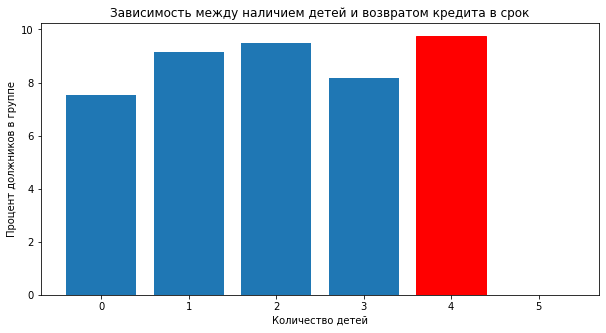

In [67]:
import matplotlib.pyplot as plt
df_children = df.groupby('children').agg({'debt': ['sum', 'count']})
df_children['percent'] = round(df_children['debt']['sum'] / df_children['debt']['count'] * 100, 3)
display(df_children.sort_values(by='percent', ascending=False))

# Визуализирем результааты
fig, ax = plt.subplots(figsize=(10,5))

max_index = np.argmax(np.array(df_children.percent))
min_index = np.argmin(np.array(df_children.percent))

barlist = ax.bar(df_children.index, df_children.percent)

barlist[max_index].set_color('r')
barlist[min_index].set_color('g')

ax.set_title('Зависимость между наличием детей и возвратом кредита в срок')
ax.set_ylabel('Процент должников в группе')
ax.set_xlabel('Количество детей')

plt.show()

**Вывод**

_Видим что наличие детей затрудняет заемщику возможность оплачивать долги в срок. Самые дисцилинированные заемщики - бездетные. Считаем, что категория с 5 детьми не уложилсь в статистику по причине ограниченности выборки (9 значений при 0 показателе задолженности), т.к. при появлении даже 1 должника в группе показатель сразу станет 10%._

- **Есть ли зависимость между семейным положением и возвратом кредита в срок?**

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


family_status_id  sum  count  percent          family_status
0                 4  274   2810    9.751  не женат / не замужем
1                 1  388   4151    9.347       гражданский брак
2                 0  931  12339    7.545        женат / замужем
3                 3   85   1195    7.113              в разводе
4                 2   63    959    6.569         вдовец / вдова

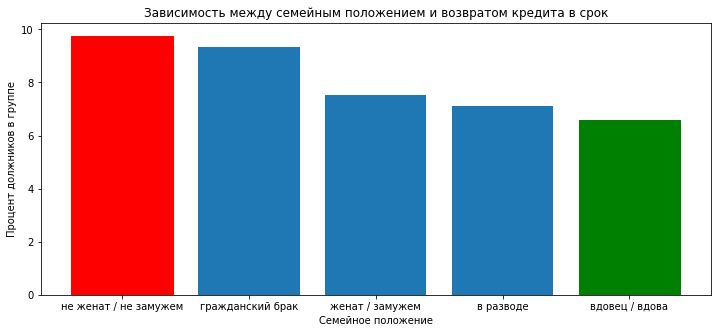

In [68]:
df_family_status = df.groupby('family_status_id').agg({'debt': ['sum', 'count']})
df_family_status['percent'] = round(df_family_status['debt']['sum'] / df_family_status['debt']['count'] * 100, 3)
df_family_status = df_family_status.sort_values(by='percent', ascending=False).\
merge(family_status_dict, on='family_status_id', how='left')
df_family_status.set_axis(['family_status_id', 'sum', 'count', 'percent', 'family_status'], axis=1, inplace=True)
display(df_family_status)

# Визуализирем результааты
fig, ax = plt.subplots(figsize=(12,5))

max_index = np.argmax(np.array(df_family_status.percent))
min_index = np.argmin(np.array(df_family_status.percent))

barlist = ax.bar(df_family_status.family_status, df_family_status.percent)

barlist[max_index].set_color('r')
barlist[min_index].set_color('g')

ax.set_title('Зависимость между семейным положением и возвратом кредита в срок')
ax.set_ylabel('Процент должников в группе')
ax.set_xlabel('Семейное положение')

plt.show()

**Вывод**

_Видим, что холостые и люди в гражданском браке самые недисципинированные заемщики. Вдовцы и вдовы же, напротив, стараются платить в срок._

- **Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


total_income_id  sum  count  percent                  range
0               4  205   2261    9.067   (132134.4, 142594.0]
1               1  187   2145    8.718     (78721.1, 98537.6]
2               3  182   2146    8.481   (116008.6, 132134.4]
3               6  181   2146    8.434   (161335.0, 179804.7]
4               7  180   2145    8.392   (179804.7, 214618.2]
5               5  170   2029    8.379   (142594.0, 161335.0]
6               2  179   2145    8.345    (98537.6, 116008.6]
7               0  157   2146    7.316   (20666.999, 78721.1]
8               9  151   2146    7.036  (269825.5, 2265604.0]
9               8  149   2145    6.946   (214618.2, 269825.5]

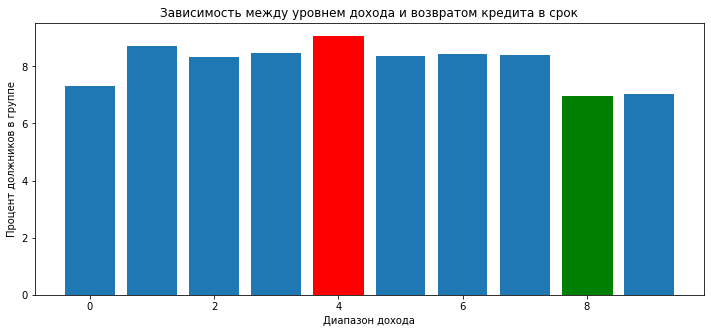

In [72]:
df_income = df.groupby('total_income_id').agg({'debt': ['sum', 'count']})
df_income['percent'] = round(df_income['debt']['sum'] / df_income['debt']['count'] * 100, 3)
df_income = df_income.sort_values(by='percent', ascending=False).\
merge(income_size_dict, on='total_income_id', how='left')
df_income.set_axis(['total_income_id', 'sum', 'count', 'percent', 'range'], axis=1, inplace=True)
display(df_income)

# Визуализирем результааты
fig, ax = plt.subplots(figsize=(12,5))

max_index = np.argmax(np.array(df_income.percent))
min_index = np.argmin(np.array(df_income.percent))

barlist = ax.bar(df_income.total_income_id, df_income.percent)

barlist[max_index].set_color('r')
barlist[min_index].set_color('g')

ax.set_title('Зависимость между уровнем дохода и возвратом кредита в срок')
ax.set_ylabel('Процент должников в группе')
ax.set_xlabel('Диапазон дохода')
# ax.set_xticklabels(list(income_size_dict.sort_values(by='total_income_id')['range']))

plt.show()

**Вывод**

_Звисимость присутствует, но не ярковыраженная. Разница в лучшей и худшей группе всего в 2 процента. По нашим данным худшие заемшики - люди со средним доходом. Люди же с самым низким и самым высоким доходом - самые дисциплинированные._

- **Как разные цели кредита влияют на его возврат в срок?**

_В данном случае применим **pivot_table** вместо метода **groupby**_

category  sum  count  percent category_name
0         1  403   4306    9.359    автомобиль
3         4  370   4013    9.220   образование
1         2  186   2324    8.003       свадьба
4         5  747  10204    7.321         жилье
2         3   35    607    5.766        ремонт

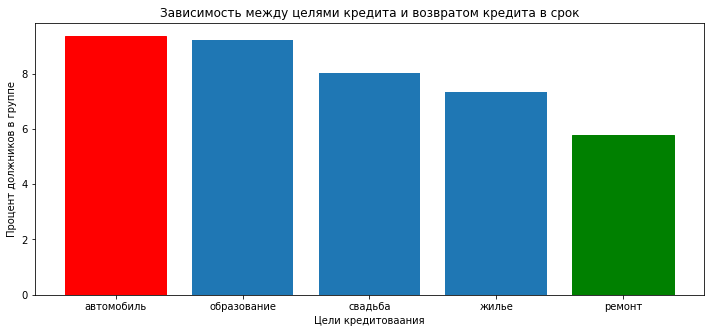

In [70]:
def finalizy(row):
    row['category_name'] = dict_inverted[int(row['category'])]
    row['percent'] = round(row['percent'] * 100, 3)
    return row
df_category = pd.pivot_table(df, index='category', values='debt', aggfunc=['sum', 'count', 'mean']).reset_index()

dict_inverted = {1: 'автомобиль', 2: 'свадьба', 3: 'ремонт', 4: 'образование', 5: 'жилье'}
df_category.set_axis(['category', 'sum', 'count', 'percent'], axis=1, inplace=True)
df_category['category_name'] = ''
try:
    df_category = df_category.apply(finalizy, axis=1)
except:
    print('Что-то пошло не так!')
df_category = df_category.sort_values(by='percent', ascending=False)
display(df_category)

# Визуализирем результааты
fig, ax = plt.subplots(figsize=(12,5))

max_index = np.argmax(np.array(df_category.percent))
min_index = np.argmin(np.array(df_category.percent))

barlist = ax.bar(df_category.category_name, df_category.percent)

barlist[max_index].set_color('r')
barlist[min_index].set_color('g')

ax.set_title('Зависимость между целями кредита и возвратом кредита в срок')
ax.set_ylabel('Процент должников в группе')
ax.set_xlabel('Цели кредитоваания')

plt.show()

**Вывод**

_Видим явную звисимость. Люди, кредитующиеся на покупку автомобиля и на образование, самые недисциплинированные. В срок стараются платить те, кто занимает на ремонт._

## Шаг 4. Общий вывод

_От кредитного отдела банка нам для анализа предоставлен датасет **/datasets/data.csv**, со статистикой о платёжеспособности клиентов. Он содержит следующую информацию:_   
- **children** — количество детей в семье
- **days_employed** — общий трудовой стаж в днях
- **dob_years** — возраст клиента в годах
- **education** — уровень образования клиента
- **education_id** — идентификатор уровня образования
- **family_status** — семейное положение
- **family_status_id** — идентификатор семейного положения
- **gender** — пол клиента
- **income_type** — тип занятости
- **debt** — имел ли задолженность по возврату кредитов
- **total_income** — ежемесячный доход
- **purpose** — цель получения кредита   

_Наша задача  была предоставить информацию для модели кредитного скоринга:_   

1. _Есть ли зависимость между наличием детей и возвратом кредита в срок?_  
2. _Есть ли зависимость между семейным положением и возвратом кредита в срок?_  
3. _Есть ли зависимость между уровнем дохода и возвратом кредита в срок?_  
4. _Как разные цели кредита влияют на его возврат в срок?_  

_Мы провели предварительную обработку датасета:    
    Отсутствующие значения в столбцах **days_employed** и **total_income** мы замении на медианные значения по группе источника доходов, восстановив таким образом 2174 записей.   
    Некорректные значения в столбце **children** заменили корректными. Спасли 123 записи.  
    В **days_employed** отрицательные значения заменили положительными.  
    В **dob_years** некорректые значения -1 и 20 заменили на 1 и 2. Спасли 101 запись.
    Столбцы **education** и **family_status** вынесли в отдельные словари, избавив их от неявных дублей предварительно.  
    В **gender** одно некорректное значение заменили на корректное.  
    Каттегоризировали данные из **purpose** с помощью леммитизации целей кредита.
    Также категоризовали **total_income** с помощью метода **qcut**.  
    Удлили 71 явный дубликат зписей в таблице методом **drop_duplicates**._   
    
_Есть рекомендция к кредитному отделу - поответственнее относиться к вводу данных. Очень много неявных дублей и некорректных данных._  
    
_После предварительной обработки пристуили к анализу. Предваритеьно группировали датасет по интересующему нас признаку и  вычисляли среднее по группам. В первых трех кейсах использовали **groupby**, в последнем **pivot_table**. Затем визуализировали данные с помощью библиотеки **matplotlib**. Анализ выявил следующие закономерности:

1. _По первому пункту: Самые дисцилинированные заемщики - бездетные. 7.544% должников в группе. В группах заемщиков, имеющих детей процент колеблется от 8.182% до 9.756%. Группа с 5 детьми выбивается из статистики, т.к. имеет мало показаний в выборке. С увеличением количества наблюдений, ситуация скорей всего выровняется._   
2. _По второму пункту: Самые опасные заемщики - холостые (9.751%) и люди в гражданском браке (9.347%). Самые дисциплинированные - вдовы и вдовцы (6.569%)._  
3. _По третьему пункту: Больше всего должников в 5ой группе (доход от 179 804.7 до 214 618.2] - 8.392%. Наименее склонны к долгам люди из 1ой (доход от 20 666.999 до 78 721.1]  - 7.316% и двух последних групп (доход от 269 825.5 до 2 265 604.0] - 6.946% и (доход от 214 618.2 до 269 825.5] - 7.036%._   
4. _По четвертому пункту: Наиболее опасны для банка люди, занимающие на приобретение автомобиля 9.359% и оплату обраазования 9.220%. Самые дисциплинированные занимают на ремонт - 5.766%._


    